### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

The independent variable is a boolean variable: congruent. If one task is in congruent word condition, then congruent = true. Otherwise, congruent = false. 


The dependent variable is a continuous variable: the total time to finish one task.

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

* Null hypothesis: the population mean of differences between a same person's reaction time of equally-sized word list in congruent and incongruent condition is 0.
* Alternative hypothesis: the population mean of differences between a same person's reaction time of equally-sized word list in congruent and incongruent condition is not 0.

To state null hypothesis and alternative hypothesis mathematically, we define the population mean of differences between reaction time of equally-sized word list in congruent and incongruent condition as $\mu_d$. Then we have null hypothesis and alternative hypothesis as follows:
* $\mathcal{H}_0$: $\mu_d = 0$.
* $\mathcal{H}_1$: $\mu_d \neq 0$.

We will use paired t-test in the following analysis. The assumptions for paired t-test are listed as follow:
* The independent variable is categorical and the dependent variable is continuous. This has been varified in part(1).
* The level of measurement of dependent variable is interval or ratio level. Reaction time is a ratio level measurement.
* The samples are dependent. In this case we compare reaction time of the same group of participants which means the samples are linked.
* No significant outliers of differences between two groups of observations. We can varify this assuption in part(4) by the box plot.
* Random sampling from the population. The paticipants are randomly selected.

To justify the choice of paired t-test, we have the following reasons:
* We choose t-test rather than z-test because we don't know the population mean of the reaction time in different conditions.
* We want to test the mean of differences of two populations, so we won't use 1-sample t-test.
* In addtion, the samples in congruent group and incongruent group are from a same group of paricipants, the congruent observations and incongruent observations are dependent.So paired t-test is chosen instead of 2-sample t-test. 

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
# Perform the analysis here
# load data
import pandas as pd
import numpy as np
import statistics
df = pd.read_csv('stroopdata.csv')
mat = df.values

#report mean
[cong_mean,incong_mean]= np.mean(mat, axis = 0)
print('-------------------------')
print('Mean: ')
print('congruent = ' + str(cong_mean))
print('incongruent = ' + str(incong_mean))

#report median
cong_median= statistics.median(mat[:, 0])
incong_median = statistics.median(mat[:, 1])
print('-------------------------')
print('Median: ')
print('congruent = ' + str(cong_median))
print('incongruent = ' + str(incong_median))

#report range
[cong_range, incong_range] = np.ptp(mat, axis = 0)
print('-------------------------')
print('Range: ')
print('congruent = ' + str(cong_range))
print('incongruent = ' + str(incong_range))

#report IQR
cong_iqr = np.subtract(*np.percentile(mat[:,0], [75, 25]))
incong_iqr = np.subtract(*np.percentile(mat[:,1], [75, 25]))
print('-------------------------')
print('IQR: ')
print('congruent = ' + str(cong_iqr))
print('incongruent = ' + str(incong_iqr))

-------------------------
Mean: 
congruent = 14.051125
incongruent = 22.0159166667
-------------------------
Median: 
congruent = 14.3565
incongruent = 21.0175
-------------------------
Range: 
congruent = 13.698
incongruent = 19.568
-------------------------
IQR: 
congruent = 4.3055
incongruent = 5.33475


We have computed some descriptive statistics above:

Mean: 
congruent = 14.051125; 
incongruent = 22.0159166667

Median: 
congruent = 14.3565; 
incongruent = 21.0175

Range: 
congruent = 13.698; 
incongruent = 19.568

IQR: 
congruent = 4.3055; 
incongruent = 5.33475

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

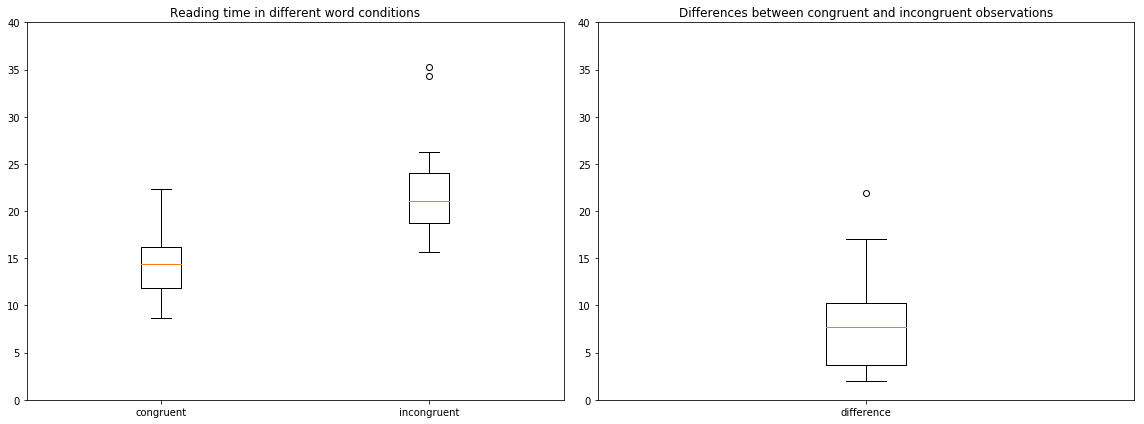

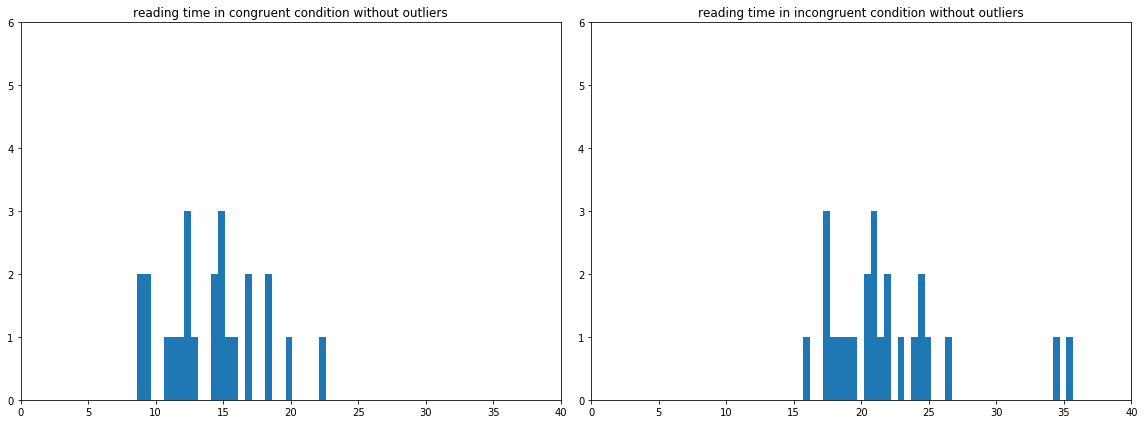

In [2]:
# Build the visualizations here
# use box plot of reaction time of two different groups and their differences.
import matplotlib as mpl
import matplotlib.pyplot as plt
diff = mat[:, 1] - mat[:, 0]

fig0 = plt.figure(1,figsize = (16,6))

ax0 = fig0.add_subplot(1,2,1)
ax1 = fig0.add_subplot(1,2,2)

ax0.set_title('Reading time in different word conditions')
ax1.set_title('Differences between congruent and incongruent observations')

ax0.boxplot(mat)
ax1.boxplot(diff)
ax0.set_ylim([0,40])
ax1.set_ylim([0,40])

plt.sca(ax0)
plt.xticks([1,2], ['congruent', 'incongruent'])
plt.sca(ax1)
plt.xticks([1], ['difference'])
fig0.tight_layout()
plt.show()

# drop outliers showed in boxplot
# def find_outliers(data):
#     quartile_1, quartile_3 = np.percentile(data,[25, 75])
#     iqr = quartile_3 - quartile_1
#     lb = quartile_1 - iqr * 1.5
#     ub = quartile_3 + iqr * 1.5
#     return np.where((data > ub) | (data < lb))

# def drop_outliers(matrix, col_index):
#     outliers = find_outliers(matrix[:,col_index])
#     result = np.delete(matrix,outliers[0],0)
#     return result
        
# mat_cleaned = drop_outliers(mat,1)

#use hist graph to check normal distribution assumption 
fig1 = plt.figure(1, figsize = (16,6))

ax0 = fig1.add_subplot(1,2,1)
ax1 = fig1.add_subplot(1,2,2)

ax0.set_title('reading time in congruent condition without outliers')
ax1.set_title('reading time in incongruent condition without outliers')
ax0.set_ylim([0, 6])
ax1.set_ylim([0, 6])
ax0.set_xlim([0,40])
ax1.set_xlim([0,40])

ax0.hist(mat[:,0],bins=np.arange(min(mat[:,0]), max(mat[:,0]) + 0.5, 0.5))
ax1.hist(mat[:,1],bins=np.arange(min(mat[:,1]), max(mat[:,1]) + 0.5, 0.5))
fig1.tight_layout()
plt.show()

1. In the upper-left graph, we use box plot to show some descriptive statistics in the two conditions. 

2. In the upper-right graph, we can see there is only one outlier in the differnces of two groups of samples. We can derive that there is no significant outlier in the differences.

3. Below the box plots, we use histogram to depict the distribution of reaction time in congruent and incongruent word conditions. The distribution is bell-like and kind of symetric, which matches one of the assumption of paired t-test.

4. In the first box plot, it is obvious that the median of reaction time in incongruent group is larger than the one in congruent group. In the histograms, we can also clearly see that the samples of reaction time in incongruent group are longer than the samples in congruent group.

Based on these observation, it seems logical to assume that reading words in incongruent condition takes longer time than reading workd in congruent condition.

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

Definition:
* $D$: differences between congruent and incongruent samples
* $\bar{D}$: sample mean of differences
* $\mu_d$: population mean of differences, we assume $\mu_d = 0$ under $\mathcal{H}_0$
* $n$: number of valid samples
* $S$: sample variance

Since reading time of congruent and incongruent both follow normal distribution and they are independent, the difference $D$ between them is also normal distributed. We can consider the pair t-test as one-sample t-test with population mean $\mu_d$ and sample $D$.

The test statistics is $T = \frac{\bar{D}-\mu_d}{S/\sqrt{n}}$ which follows Student's t-distribution.

Here we define significance level $\alpha = 0.05$.

Under $\mathcal{H}_0$, we have $\mu_d = 0$. Then we conduct the one-sample t-test with the dataset as follow:

In [3]:
import scipy.stats as stats
stats.ttest_1samp(a = mat[:,1]- mat[:,0], popmean = 0)

Ttest_1sampResult(statistic=8.020706944109957, pvalue=4.1030005857111781e-08)

Or we could use paired t-test to get the same result:

In [4]:
stats.ttest_rel(a = mat[:,1], b = mat[:,0])

Ttest_relResult(statistic=8.020706944109957, pvalue=4.1030005857111781e-08)

As you can see the p-value = 4.1030005857111781e-08 << $\alpha$ = 0.05, which means we should reject $\mathcal{H}_0$.

In addition, we can compute a $95\%$ confidence interval for $\mu_d$:

In [5]:
import math

D = mat[:,1] - mat[:,0]
n = len(mat)

stats.t.interval(
    alpha = 0.95,
    df = n - 1,
    loc = np.mean(D, axis = 0),
    scale = np.std(D, axis = 0) / math.sqrt(n)
)

(5.9538073467507431, 9.9757759865825886)

From above, we can see $\mu_d = 0$ is not in the $95\%$ interval, which also means we should reject $\mathcal{H}_0$.

#### The reason to reject $\mathcal{H}_0$:

* The p-value $\approx 4.1\times10^{-8}$. Since p-value is the smallest significance level that lead us to reject $\mathcal{H_0}$, it infers that the probability to have type I error is around $4.1\times10^{-8}$. So we have a very low chance to reject $\mathcal{H}_0$ while $\mathcal{H}_0$ is true.


* Another way to interpret p-value: p-value is the probability that we observe a more extreme statistic than we did under $\mathcal{H}_0$. Notice that the p-value we obtained is extremely small. We can infer that if $\mathcal{H}_0$ were true, our observation is almost impossible to happen. Namely, $\mathcal{H}_0$ can hardly be true.


* The $95\%$ confidence interval is $(5.9538073467507431, 9.9757759865825886)$. It means that we can be $95\%$ sure that the $\mu_d = 0$ is not contained in this interval. This conclusion also help us to reject $\mathcal{H}_0$ logically.

#### Interpret the statistical results

We rejected $\mathcal{H}_0$ above, this means the durations that a same person to read a equally-sized word list in different conditions(congruent condition and incongruent condtion) are different. We can draw a conclusion that there is a high probability that the stroop effect exists.